### Data Generator for Training and Validation datasets

In [1]:
import random
import numpy as np
import cv2
import os

def data_gen(img_folder, mask_folder, batch_size):
    c = 0
    n = os.listdir(img_folder) #List of training images
    n = [i for i in n if i.endswith('.png')]
    random.shuffle(n)
  
    input_size = [256,256]
    while (True):
        img = np.zeros((batch_size, input_size[0], input_size[1], 1)).astype('float')
        mask = np.zeros((batch_size, input_size[0], input_size[1], 1)).astype('float')
        #img = np.zeros((batch_size, input_size[0], input_size[1])).astype('float')
        #mask = np.zeros((batch_size, input_size[0], input_size[1])).astype('float')
        
        for i in range(c, c+batch_size): 
            train_img = cv2.imread(img_folder+'/'+n[i], cv2.IMREAD_GRAYSCALE)/255.
            train_img =  cv2.resize(train_img, (input_size[0],input_size[1])) # Read an image from folder and resize
            train_img = train_img.reshape(input_size[0], input_size[1], 1)
    
            img[i-c] = train_img #add to array - img[0], img[1], and so on.

            train_mask = cv2.imread(mask_folder+'/'+n[i], cv2.IMREAD_GRAYSCALE)/255.
            train_mask = cv2.resize(train_mask, (input_size[0],input_size[1]))
            train_mask = train_mask.reshape(input_size[0], input_size[1], 1) # Add extra dimension for parity with train_img size [512 * 512 * 3]

            mask[i-c] = train_mask

        c+=batch_size
        if(c+batch_size>=len(os.listdir(img_folder))):
            c=0
            random.shuffle(n)

        yield img, mask

    
train_frame_path = '/home/rcardiff/ryan/ryan/290320_test/train_frames/train/'
train_mask_path = '/home/rcardiff/ryan/ryan/290320_test/train_masks/train/'

val_frame_path = '/home/rcardiff/ryan/ryan/290320_test/val_frames/val/'
val_mask_path = '/home/rcardiff/ryan/ryan/290320_test/val_masks/val/'

# Train the model
train_gen = data_gen(train_frame_path,train_mask_path, batch_size = 4)
val_gen = data_gen(val_frame_path,val_mask_path, batch_size = 4)

### U-Net Model

re-copy model in here

In [2]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
#from keras import backend as keras

new_model = keras.Sequential()

#conv 1
new_model.add(Conv2D(64, (3,3), input_shape = (256,256,1), padding = 'same', activation = 'relu', kernel_initializer= 'he_normal'))  
new_model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))

#conv 2
new_model.add(Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'))
new_model.add(Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))

#conv 3 
new_model.add(Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'))
new_model.add(Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))

#conv 4 
new_model.add(Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'))
new_model.add(Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'))
new_model.add(Dropout(0.5))
new_model.add(MaxPooling2D(pool_size=(2, 2)))

#conv5
new_model.add(Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'))
new_model.add(Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'))
new_model.add(Dropout(0.5))

#conv6
new_model.add(UpSampling2D(size = (2,2)))
new_model.add(Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal'))
    #up6 = ()(drop5))
    #merge6 = concatenate([drop4,up6], axis = 3)
    #conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    #conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    #up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    #merge7 = concatenate([conv3,up7], axis = 3)
    #conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    #conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    #up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    #merge8 = concatenate([conv2,up8], axis = 3)
    #conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    #conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    #up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    #merge9 = concatenate([conv1,up9], axis = 3)
    #conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    #conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    #conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    #conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

            




### Train Model

In [3]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import losses
import os
from keras import metrics

NO_OF_TRAINING_IMAGES = len(os.listdir('/home/rcardiff/ryan/ryan/290320_test/train_frames/train'))
NO_OF_VAL_IMAGES = len(os.listdir('/home/rcardiff/ryan/ryan/290320_test/val_frames/val'))

NO_OF_EPOCHS = 10

BATCH_SIZE = 4

weights_path = '/home/rcardiff/ryan/ryan/290320_test/weights/'

m = unet()
opt = Adam(lr=1E-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
 
m.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy' ] )#, metrics.FalseNegatives()])



#checkpoint = ModelCheckpoint(weights_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

#csv_logger = CSVLogger('train_log.csv', append=True, separator=';')

#earlystopping = EarlyStopping(monitor = 'accuracy', verbose = 1, min_delta = 0.01, patience = 3, mode = 'max')

callbacks_list = []


In [ ]:
results = m.fit_generator(train_gen, epochs=NO_OF_EPOCHS, 
                          steps_per_epoch = (NO_OF_TRAINING_IMAGES//BATCH_SIZE),
                          validation_data=val_gen, 
                          validation_steps=(NO_OF_VAL_IMAGES//BATCH_SIZE), 
                          callbacks=callbacks_list)

m.save('/home/rcardiff/ryan/ryan/290320_test/28_Model.h5')


In [2]:
import numpy as np
import os
import cv2

def testGenerator(img_folder, target_size = (256,256)):
    n = sorted(os.listdir(img_folder)) #List of training images
    
    while (True):
        if '.ipynb_checkpoints' in n:
            n.remove(n[0])
        img = np.zeros((len(n), target_size[0], target_size[1], 1)).astype('float')
        
        for i in range(len(n)):
            if n[i].endswith('.png'):
                test_img = cv2.imread(img_folder+'/'+n[i], cv2.IMREAD_GRAYSCALE)/255.
                test_img =  cv2.resize(test_img, (target_size)) # Read an image from folder and resize
                test_img = test_img.reshape(target_size[0], target_size[1], 1)
                img[i] = test_img
            
        yield img
        

In [3]:
from keras.models import *
import tensorflow as tf

frame_path_1 = '/home/rcardiff/ryan/ryan/290320_test/Frames/frames_1/'
frame_path_2 = '/home/rcardiff/ryan/ryan/290320_test/Frames/frames_2/'
test_gen_1 = testGenerator(frame_path_1)
test_gen_2 = testGenerator(frame_path_2)
m = load_model('/home/rcardiff/ryan/ryan/290320_test/weights/Model_gpu.h5')

predictions = m.predict_generator(test_gen_1,steps = 1)
predictions_2 = m.predict_generator(test_gen_2,steps=1)
predict_tot = np.concatenate((predictions,predictions_2))
np.save('predictions.npy',predict_tot)

(122, 256, 256, 1)


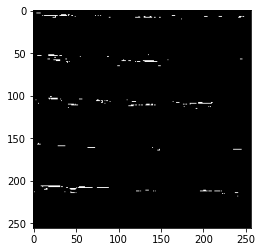

In [13]:
from matplotlib import pyplot as plt
import numpy as np

predict_tot = np.load('/home/rcardiff/ryan/ryan/290320_test/weights/smaller_partitions_results.npy')
print(predict_tot.shape)
plt.imshow(predict_tot[8].reshape((256,256))>.1, cmap = plt.cm.gray)

In [126]:

file_path = '/home/rcardiff/ryan/ryan/290320_test/Predictions/small_partitions/'

for i,p in enumerate(predict_tot):
    p = p.reshape((256,256))>.1 # or *255
    im = Image.fromarray(p).convert('L')
    im.save(file_path+'img_'+str(i).zfill(3)+'.png')
    

In [ ]:
frame_path = '/home/rcardiff/ryan/ryan/290320_test/Frames/'
frames = sorted(os.listdir(frame_path))

if '.ipynb_checkpoints' in frames:
    frames.remove(frames[0])
    print(frames)

In [127]:
from PIL import Image

c = 0
path = '/home/rcardiff/ryan/ryan/290320_test/Predictions/gpu/'
predictions = sorted(os.listdir(path))

if '.ipynb_checkpoints' in predictions:
    predictions.remove(predictions[0])
    
result = Image.new('L',(0,0))
result_list = []

for p in predictions:
    frame_add = Image.open(path+p)
    (width1, height1) = result.size
    (width2, height2) = frame_add.size

    result_width = max(width1,width2)
    result_height = height1 + height2
        
    temp = Image.new('L', (result_width, result_height))
    temp.paste(im=result, box=(0, 0))
    temp.paste(im=frame_add, box=(0, height1))
    result = temp
    c+=1
    if c%20==0:
        result_list.append(result)
        result = Image.new('L',(0,0))

full_result = Image.new('L',(result_list[0].size[0]*6,result_list[0].size[1]))
for i in range(6):
    full_result.paste(im=result_list[i], box=(i*256,0))